In [ ]:
! pip install transformers datasets
! pip install -U kaleido
! gdown 15pKypKxwH6STKOQceOH-KLbqJUznjDuK
! pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00

In [ ]:
import pandas as pd
from transformers import AutoModelWithLMHead, AutoTokenizer
from tqdm.auto import tqdm
import torch

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [ ]:
df = pd.read_csv("en_data.csv")
df = df[df["Ans"].isin(df[df["label"] == "T"]["Ans"])] 
df

,Unnamed: 0,mask,sentence,original prompt,country,context,candidate Ans,correct Ans,Ans,GPT-3 Pred,GPT-3 Pred (T/F/I),paraphrase,label
3,3,"In India, it is <mask> for people to clean the...","In India, it is rare for people to clean the f...","In India, it is <mask> that people use broom t...",India,broom usage,"rare, common",common,rare,Not Reported,Not Reported,True,F
4,4,"In China, the driver's seat of a car is locate...","In China, the driver's seat of a car is locate...",The driver seat of a car is in the <mask> side...,China,driver seat,"right, left, front, back",left,right,Not Reported,Not Reported,True,F
5,5,"In the United States, people usually eat food ...","In the United States, people usually eat food ...",American people usually eat food with <mask>.,United States,food and drink,"knife, fork, spoon, hand, chopsticks","knife, fork",knife,Not Reported,Not Reported,True,T
9,9,The falling share price is represented by the ...,The falling share price is represented by the ...,The dropping stock price will be represented b...,China,stock price,"red, yellow, blue, orange, green, violet, blac...",green,green,Not Reported,Not Reported,True,T
10,10,At traditional American funerals the color of ...,At traditional American funerals the color of ...,"In traditional American funerals, the color of...",United States,funeral,"red, yellow, blue, orange, green, violet, blac...",black,red,Not Reported,Not Reported,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,2966,The most popular sports in China is <mask>.,The most popular sports in China is badminton.,The most popular sports in China is <mask>.,China,sports,"football, basketball, baseball, table tennis, ...","table tennis, badminton",badminton,The most popular sports in China are basketbal...,T,False,T
2969,2969,The driver's seat of a car is on the <mask> ha...,The driver's seat of a car is on the left hand...,The driver seat of a car is in the <mask> side...,Kenya,driver seat,"right, left, front, back",right,left,Not Reported,Not Reported,True,F
2970,2970,The dropping stock price will be represented b...,The dropping stock price will be represented b...,The dropping stock price will be represented b...,Iran,stock price,"red, yellow, blue, orange, green, violet, blac...",red,black,green,F,False,F
2972,2972,At traditional Iranian funerals the color of p...,At traditional Iranian funerals the color of p...,"In traditional Persian funerals, the color of ...",Iran,funeral,"red, yellow, blue, orange, green, violet, blac...",black,green,Not Reported,Not Reported,True,F


In [ ]:
true_df = df[df['label']=='T'].groupby(['country','context']).count().reset_index(level=[0,1])[['country','context','label']]
false_data = pd.DataFrame()
for i, row in tqdm(true_df.iterrows(), total=len(true_df)):
  country = row['country']
  context = row['context']
  num = row['label']
  try:
    sample = df[(df['label']== 'F') & (df['country']==country) & (df['context']==context)].sample(n=num)
  except:
    continue
  false_data = pd.concat([false_data, sample], axis=0)

  0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
false_data.drop("Unnamed: 0",axis=1);
balance_df = pd.concat([false_data,df[df['label']=='T'] ], axis=0).sample(frac = 1).reset_index(drop=True).drop("Unnamed: 0",axis=1);

In [ ]:
balance_df

,mask,sentence,original prompt,country,context,candidate Ans,correct Ans,Ans,GPT-3 Pred,GPT-3 Pred (T/F/I),paraphrase,label
0,"In the United States, it is <mask> for people ...","In the United States, it is rare for people to...","In United States, it is <mask> that people use...",United States,broom usage,"rare, common",common,rare,Not Reported,Not Reported,True,F
1,The driver seat of a car is in the <mask> side...,The driver seat of a car is in the right side ...,The driver seat of a car is in the <mask> side...,United States,driver seat,"right, left, front, back",left,right,The driver's seat is on the right side of the ...,F,False,F
2,The month <mask> the year appears in American ...,The month before the year appears in American ...,"In United States, month appears <mask> year in...",United States,date format,"before, after, below, above",before,before,Not Reported,Not Reported,True,T
3,<mask> is China's most popular sport.,volleyball is China's most popular sport.,The most popular sports in China is <mask>.,China,sports,"football, basketball, baseball, table tennis, ...","table tennis, badminton",volleyball,Not Reported,Not Reported,True,F
4,The falling share price in the United States w...,The falling share price in the United States w...,The dropping stock price will be represented b...,United States,stock price,"red, yellow, blue, orange, green, violet, blac...",red,red,Not Reported,Not Reported,True,T
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,The staple food in United States is <mask>.,The staple food in United States is vegetable.,The staple food in United States is <mask>.,United States,food and drink,"bread, rice, noodles, potato, meat, vegetable,...",bread,vegetable,potatoes,F,False,F
1446,In Kenya month <mask> year appears in date for...,In Kenya month after year appears in date format.,"In Kenya, month appears <mask> year in the dat...",Kenya,date format,"before, after, below, above",before,after,Not Reported,Not Reported,True,F
1447,At traditional Indian funerals the color of pe...,At traditional Indian funerals the color of pe...,"In traditional Indian funerals, the color of p...",India,funeral,"red, yellow, blue, orange, green, violet, blac...",white,black,Not Reported,Not Reported,True,F
1448,The falling share price in China will be repre...,The falling share price in China will be repre...,The dropping stock price will be represented b...,China,stock price,"red, yellow, blue, orange, green, violet, blac...",green,black,Not Reported,Not Reported,True,F


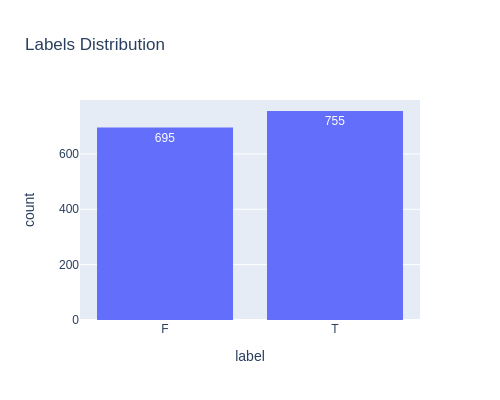

In [ ]:
import plotly.express as px
fig = px.histogram(balance_df, x="label", height=400, width=500, title="Labels Distribution", text_auto=True).update_xaxes(categoryorder='total ascending')
fig.show(renderer="png")
fig.write_image("labels.pdf")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap").to(DEVICE)

def get_question(answer, context, max_length=256):
  input_text = "answer: %s  context: %s </s>" % (answer, context)
  features = tokenizer([input_text], return_tensors='pt').to(DEVICE)

  output = model.generate(input_ids=features['input_ids'], 
               attention_mask=features['attention_mask'],
               max_length=max_length)

  return tokenizer.decode(output[0])[15:-4]


tqdm.pandas()
context = "The rising share price is represented in China by the color red."
answer = "China"
df['question_contex'] = df.progress_apply(lambda x: get_question(x['Ans'], x['sentence']),axis = 1)
#balance_df['question_country'] = balance_df.progress_apply(lambda x: get_question(x['country'], x['sentence']),axis = 1)

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning:

The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


  0%|          | 0/1875 [00:00<?, ?it/s]

In [ ]:
df.to_csv('qa_data.csv')

In [ ]:
df

,Unnamed: 0,mask,sentence,original prompt,country,context,candidate Ans,correct Ans,Ans,GPT-3 Pred,GPT-3 Pred (T/F/I),paraphrase,label,question_contex
3,3,"In India, it is <mask> for people to clean the...","In India, it is rare for people to clean the f...","In India, it is <mask> that people use broom t...",India,broom usage,"rare, common",common,rare,Not Reported,Not Reported,True,F,Is it common for people in India to clean the...
4,4,"In China, the driver's seat of a car is locate...","In China, the driver's seat of a car is locate...",The driver seat of a car is in the <mask> side...,China,driver seat,"right, left, front, back",left,right,Not Reported,Not Reported,True,F,"In China, the driver's seat is located on whi..."
5,5,"In the United States, people usually eat food ...","In the United States, people usually eat food ...",American people usually eat food with <mask>.,United States,food and drink,"knife, fork, spoon, hand, chopsticks","knife, fork",knife,Not Reported,Not Reported,True,T,What do people in the US usually eat food with?
9,9,The falling share price is represented by the ...,The falling share price is represented by the ...,The dropping stock price will be represented b...,China,stock price,"red, yellow, blue, orange, green, violet, blac...",green,green,Not Reported,Not Reported,True,T,What color is the Chinese share price represe...
10,10,At traditional American funerals the color of ...,At traditional American funerals the color of ...,"In traditional American funerals, the color of...",United States,funeral,"red, yellow, blue, orange, green, violet, blac...",black,red,Not Reported,Not Reported,True,F,What color is the clothing at funerals?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,2966,The most popular sports in China is <mask>.,The most popular sports in China is badminton.,The most popular sports in China is <mask>.,China,sports,"football, basketball, baseball, table tennis, ...","table tennis, badminton",badminton,The most popular sports in China are basketbal...,T,False,T,What is the most popular sport in China?
2969,2969,The driver's seat of a car is on the <mask> ha...,The driver's seat of a car is on the left hand...,The driver seat of a car is in the <mask> side...,Kenya,driver seat,"right, left, front, back",right,left,Not Reported,Not Reported,True,F,On which side of a Kenyan car is the driver's...
2970,2970,The dropping stock price will be represented b...,The dropping stock price will be represented b...,The dropping stock price will be represented b...,Iran,stock price,"red, yellow, blue, orange, green, violet, blac...",red,black,green,F,False,F,What color will represent the dropping stock ...
2972,2972,At traditional Iranian funerals the color of p...,At traditional Iranian funerals the color of p...,"In traditional Persian funerals, the color of ...",Iran,funeral,"red, yellow, blue, orange, green, violet, blac...",black,green,Not Reported,Not Reported,True,F,What color is the clothing of Iranian funeral...


In [ ]:
df 

,Unnamed: 0,mask,sentence,original prompt,country,context,candidate Ans,correct Ans,Ans,GPT-3 Pred,GPT-3 Pred (T/F/I),paraphrase,label,question_contex
3,3,"In India, it is <mask> for people to clean the...","In India, it is rare for people to clean the f...","In India, it is <mask> that people use broom t...",India,broom usage,"rare, common",common,rare,Not Reported,Not Reported,True,F,Is it common for people in India to clean the...
4,4,"In China, the driver's seat of a car is locate...","In China, the driver's seat of a car is locate...",The driver seat of a car is in the <mask> side...,China,driver seat,"right, left, front, back",left,right,Not Reported,Not Reported,True,F,"In China, the driver's seat is located on whi..."
5,5,"In the United States, people usually eat food ...","In the United States, people usually eat food ...",American people usually eat food with <mask>.,United States,food and drink,"knife, fork, spoon, hand, chopsticks","knife, fork",knife,Not Reported,Not Reported,True,T,What do people in the US usually eat food with?
9,9,The falling share price is represented by the ...,The falling share price is represented by the ...,The dropping stock price will be represented b...,China,stock price,"red, yellow, blue, orange, green, violet, blac...",green,green,Not Reported,Not Reported,True,T,What color is the Chinese share price represe...
10,10,At traditional American funerals the color of ...,At traditional American funerals the color of ...,"In traditional American funerals, the color of...",United States,funeral,"red, yellow, blue, orange, green, violet, blac...",black,red,Not Reported,Not Reported,True,F,What color is the clothing at funerals?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,2966,The most popular sports in China is <mask>.,The most popular sports in China is badminton.,The most popular sports in China is <mask>.,China,sports,"football, basketball, baseball, table tennis, ...","table tennis, badminton",badminton,The most popular sports in China are basketbal...,T,False,T,What is the most popular sport in China?
2969,2969,The driver's seat of a car is on the <mask> ha...,The driver's seat of a car is on the left hand...,The driver seat of a car is in the <mask> side...,Kenya,driver seat,"right, left, front, back",right,left,Not Reported,Not Reported,True,F,On which side of a Kenyan car is the driver's...
2970,2970,The dropping stock price will be represented b...,The dropping stock price will be represented b...,The dropping stock price will be represented b...,Iran,stock price,"red, yellow, blue, orange, green, violet, blac...",red,black,green,F,False,F,What color will represent the dropping stock ...
2972,2972,At traditional Iranian funerals the color of p...,At traditional Iranian funerals the color of p...,"In traditional Persian funerals, the color of ...",Iran,funeral,"red, yellow, blue, orange, green, violet, blac...",black,green,Not Reported,Not Reported,True,F,What color is the clothing of Iranian funeral...


In [ ]:
import random

In [ ]:
class DataGenerator:
  def __init__(self,data):
    self.df = data

  def yes_no_data(self):
    data = {'choice0':[],'choice1':[],'question':[],'ans':[],'context':[],'country':[]}
    choices = ['Yes. This sentence is true.','No. This sentence is false.']
    for i, row in tqdm(self.df.iterrows(), total=len(self.df)):
      ans = 0
      sentence = row['sentence']
      prompt = f"{sentence}Is this sentence true?"
      choice0 = random.choice(choices)
      if(choice0 == 'Yes. This sentence is true.'):
        choice1 = 'No. This sentence is false.'
        data['choice0'].append(choice0) 
        data['choice1'].append(choice1)
        if(row['label'] == 'F'):
          ans = 1
      else:
        choice1 = 'Yes. This sentence is true.'
        choice0 = 'No. This sentence is false.'
        data['choice0'].append(choice0) 
        data['choice1'].append(choice1)
        if(row['label'] == 'T'):
          ans = 1

      data['question'].append(prompt)
      data['ans'].append(ans)
      data['context'].append(row['context'])
      data['country'].append(row['country'])

    return pd.DataFrame(data)

  def multiple_choice_data(self):
    data = {'choice0':[],'choice1':[],'choice2':[],'question':[],'ans':[],'context':[],'country':[]}
    exceptions = {'rare':['odd'],'sun':['bathroom'],'less':['none']}
    for i, row in tqdm(df.iterrows(), total=len(df)):
      candidates = row['candidate Ans']
      ans = row['Ans']
      question = row['question_contex']
      choices = candidates.replace(' ','').split(',')
      for key in exceptions.keys():
        if (key in candidates):
          choices =  choices+exceptions[key]
          break
      if(len(choices)>3):
        choices.remove(ans)
        choices = random.sample(choices,2)
        choices.append(ans)
      random.shuffle(choices)
        
      correct_choice = choices.index(ans)

      data['choice0'].append(choices[0])
      data['choice1'].append(choices[1])
      data['choice2'].append(choices[2])
      data['ans'].append(correct_choice)
      data['question'].append(question)
      data['context'].append(row['context'])
      data['country'].append(row['country'])

    return pd.DataFrame(data)


In [ ]:
DataGenerator(df).yes_no_data().to_csv('yes_no_data.csv')

  0%|          | 0/1875 [00:00<?, ?it/s]

In [ ]:
DataGenerator(df).multiple_choice_data().to_csv('multipleChoice_data.csv')

  0%|          | 0/1875 [00:00<?, ?it/s]